In [2]:
import pandas as pd
import numpy as np

import gensim
from gensim.utils import simple_preprocess

import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from afinn import Afinn


from collections import Counter

import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [251]:
data = pd.read_csv('MBTI.csv')

In [255]:
data

,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Emoticons_count,Reddit,Twitter,Typology,Kaggle
0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,memeincorrect quote sure trying keep_peace family,1,1,0,0,0
1,ENTP,memefour distinct flavors nt,memefour distinct flavors nt,memefour distinct flavor,memefour distinct flavors nt,memefour distinct flavors nt,0,1,0,0,0
2,ENTP,memethis definitely intp looks like,memethis definitely intp looks like,memethi definit intp look like,memethis definitely intp looks_like,memethis definitely intp looks_like,0,1,0,0,0
3,ISFJ,theory questionwhat type admire,theory questionwhat type admire,theori questionwhat type admir,theory_questionwhat type admire,theory_questionwhat type admire,0,1,0,0,0
4,ISTJ,memeistj x enfp real,memeistj x enfp real,memeistj enfp real,memeistj x enfp real,memeistj x enfp real,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
127578,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,always think cats fi_doms reason websites beco...,13,0,0,0,1
127579,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,soif thread already_exists someplace_else heck...,22,0,0,0,1
127580,INTP,many questions things would take purple pill p...,many questions things would take purple pill p...,question thing purpl pill pick win lotteri num...,many questions things would take purple pill p...,many questions things would take purple pill p...,2,0,0,0,1
127581,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,1,0,0,0,1


In [258]:
df = data.copy()

In [259]:
# calculate length of list
df['Length'] = df['Cleaned_Text_No_Emoticon'].apply(len)

# for each set of lyrics, create a Counter dictionary
df['Unique_Words'] = df['Cleaned_Text_No_Emoticon'].apply(Counter).apply(len)

df['TTR'] = df['Unique_Words']/df['Length']

In [260]:
filepath = ('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
emolex_df = pd.read_csv(filepath,
                    names=["word", "emotion", "association"],
                    sep='\t')
emolex_words = emolex_df.pivot(index='word',
                           columns='emotion',
                           values='association').reset_index()

emolex_words = emolex_words[1:]

In [261]:
new_df = df.copy()
emotions = emolex_words.columns.drop('word')
emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

def emotion(sent):
    emo_df = []
    for word in word_tokenize(sent):
        emo_score = emolex_words[emolex_words.word == word].drop(columns = 'word')

        if len(emo_score) != 0:
            values = emo_score.values[0].tolist()
            values = list(map(int, values))
            emo_df.append(values)
    value = [sum(x) for x in zip(*emo_df)]

    return value


In [262]:
df["emotion"] = df['Cleaned_Text_No_Emoticon'].apply(lambda x: emotion(x))

In [263]:
df

,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Emoticons_count,Reddit,Twitter,Typology,Kaggle,Length,Unique_Words,TTR,emotion
0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,memeincorrect quote sure trying keep_peace family,1,1,0,0,0,49,19,0.387755,"[0, 2, 0, 0, 1, 1, 2, 0, 1, 1]"
1,ENTP,memefour distinct flavors nt,memefour distinct flavors nt,memefour distinct flavor,memefour distinct flavors nt,memefour distinct flavors nt,0,1,0,0,0,28,16,0.571429,[]
2,ENTP,memethis definitely intp looks like,memethis definitely intp looks like,memethi definit intp look like,memethis definitely intp looks_like,memethis definitely intp looks_like,0,1,0,0,0,35,15,0.428571,[]
3,ISFJ,theory questionwhat type admire,theory questionwhat type admire,theori questionwhat type admir,theory_questionwhat type admire,theory_questionwhat type admire,0,1,0,0,0,31,17,0.548387,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 2]"
4,ISTJ,memeistj x enfp real,memeistj x enfp real,memeistj enfp real,memeistj x enfp real,memeistj x enfp real,0,1,0,0,0,20,14,0.700000,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127578,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,always think cats fi_doms reason websites beco...,13,0,0,0,1,2833,27,0.009531,"[9, 27, 5, 12, 28, 20, 53, 8, 9, 26]"
127579,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,soif thread already_exists someplace_else heck...,22,0,0,0,1,4470,27,0.006040,"[9, 28, 4, 14, 35, 22, 68, 11, 13, 34]"
127580,INTP,many questions things would take purple pill p...,many questions things would take purple pill p...,question thing purpl pill pick win lotteri num...,many questions things would take purple pill p...,many questions things would take purple pill p...,2,0,0,0,1,3409,27,0.007920,"[18, 28, 10, 13, 26, 28, 54, 11, 11, 31]"
127581,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,1,0,0,0,1,5396,27,0.005004,"[15, 32, 8, 15, 28, 35, 59, 20, 10, 34]"


In [264]:
df[emotions] = pd.DataFrame(df.emotion.tolist(), index= df.index)

In [265]:
df = df.fillna(0)

In [266]:
for emotion in emotions:
    df[emotion] = df[emotion] / df['Length']

In [267]:
df["Emoticons Avg"] = df["Emoticons_count"]/df['Length']

In [268]:
df

,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Emoticons_count,Reddit,Twitter,Typology,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Emoticons Avg
0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,memeincorrect quote sure trying keep_peace family,1,1,0,0,...,0.040816,0.000000,0.000000,0.020408,0.020408,0.040816,0.000000,0.020408,0.020408,0.020408
1,ENTP,memefour distinct flavors nt,memefour distinct flavors nt,memefour distinct flavor,memefour distinct flavors nt,memefour distinct flavors nt,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENTP,memethis definitely intp looks like,memethis definitely intp looks like,memethi definit intp look like,memethis definitely intp looks_like,memethis definitely intp looks_like,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ISFJ,theory questionwhat type admire,theory questionwhat type admire,theori questionwhat type admir,theory_questionwhat type admire,theory_questionwhat type admire,0,1,0,0,...,0.032258,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.064516,0.000000
4,ISTJ,memeistj x enfp real,memeistj x enfp real,memeistj enfp real,memeistj x enfp real,memeistj x enfp real,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127578,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,always think cats fi_doms reason websites beco...,13,0,0,0,...,0.009531,0.001765,0.004236,0.009884,0.007060,0.018708,0.002824,0.003177,0.009178,0.004589
127579,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,soif thread already_exists someplace_else heck...,22,0,0,0,...,0.006264,0.000895,0.003132,0.007830,0.004922,0.015213,0.002461,0.002908,0.007606,0.004922
127580,INTP,many questions things would take purple pill p...,many questions things would take purple pill p...,question thing purpl pill pick win lotteri num...,many questions things would take purple pill p...,many questions things would take purple pill p...,2,0,0,0,...,0.008214,0.002933,0.003813,0.007627,0.008214,0.015840,0.003227,0.003227,0.009094,0.000587
127581,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,1,0,0,0,...,0.005930,0.001483,0.002780,0.005189,0.006486,0.010934,0.003706,0.001853,0.006301,0.000185


In [298]:
emotions_list = {0: "anger", 1: "anticipation", 2:"disgust", 3:"fear", 4:"joy", 5:"negative", 6:"positive", 7:"sadness", 8:"surprise", 9:"trust"}


def max_emotion(l):
    if all(v == 0 for v in l):
        return []
    else:
        indices = [i for i, x in enumerate(l) if x == max(l)]
        return list(map(emotions_list.__getitem__, indices))

In [299]:
df.iloc[0:10]['emotion'].apply(lambda x: max_emotion(x))

0                    [anticipation, positive]
1                                          []
2                                          []
3                                     [trust]
4                           [positive, trust]
5                                  [negative]
6         [anticipation, fear, joy, positive]
7                                          []
8                        [negative, positive]
9    [anticipation, negative, sadness, trust]
Name: emotion, dtype: object

In [300]:
# each row choose the predominant emotion
df['Dominant Emotion'] = df['emotion'].apply(lambda x: max_emotion(x))

In [303]:
df = df[['Tag', 'Cleaned_Text', 'Cleaned_Text_No_Emoticon', 'Text_stemmed',
       'Bigram', 'Trigram', 'Length', 'Emoticons_count', 'Emoticons Avg',  'Unique_Words', 'TTR', 'Dominant Emotion',  'anger',
       'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust', 'emotion', 'Reddit',  'Twitter', 'Typology',
       'Kaggle' ]]

In [304]:
df.to_csv("MBTI_features.csv")

In [236]:
df = df.sort_values('Tag')
df = df.reset_index().drop(columns = 'index')

In [237]:
groups = df.groupby("Tag")

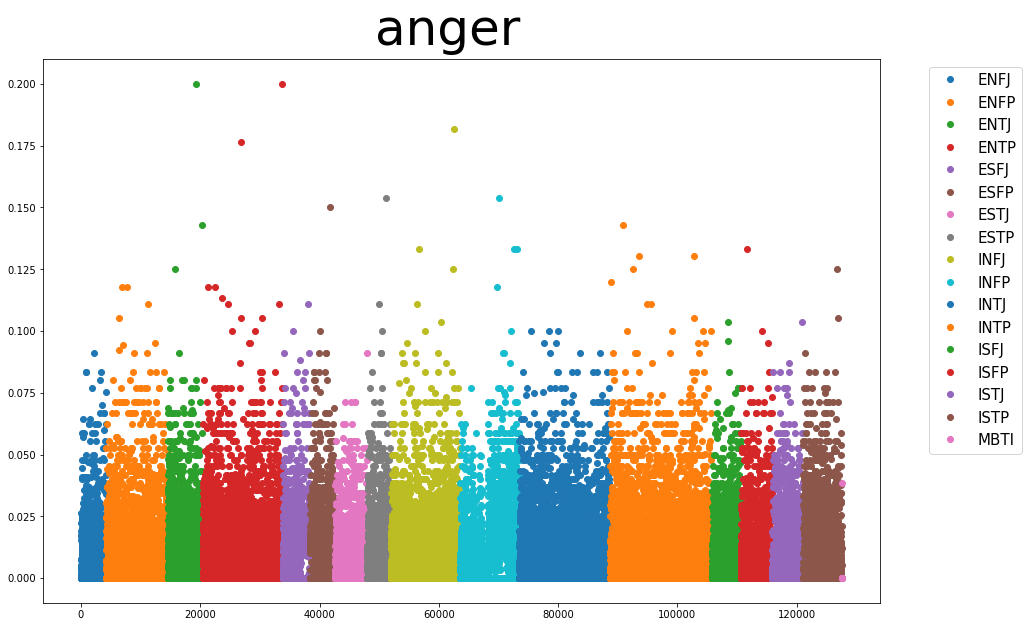

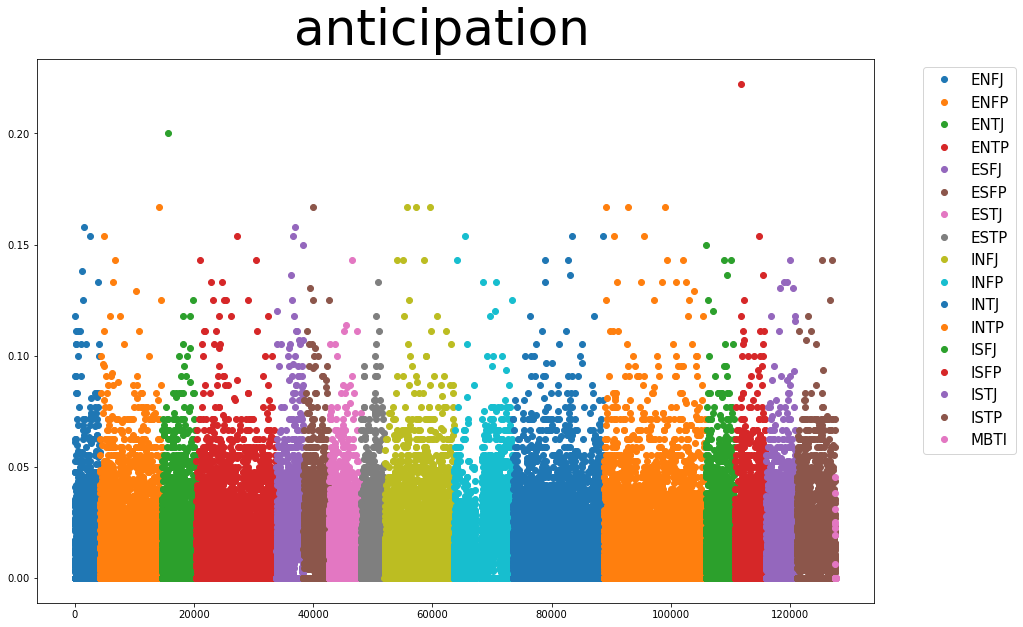

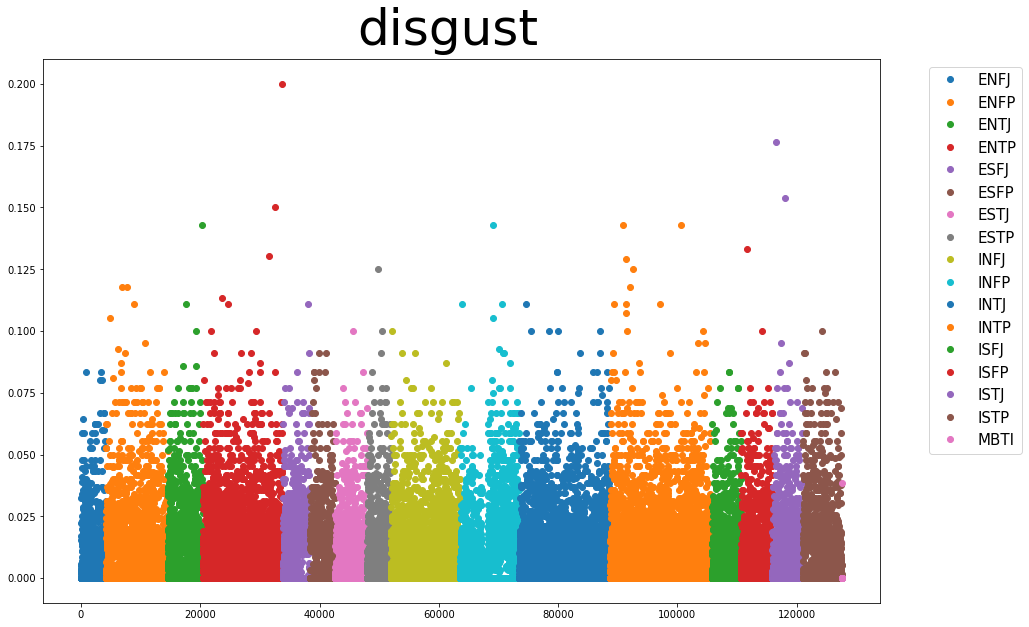

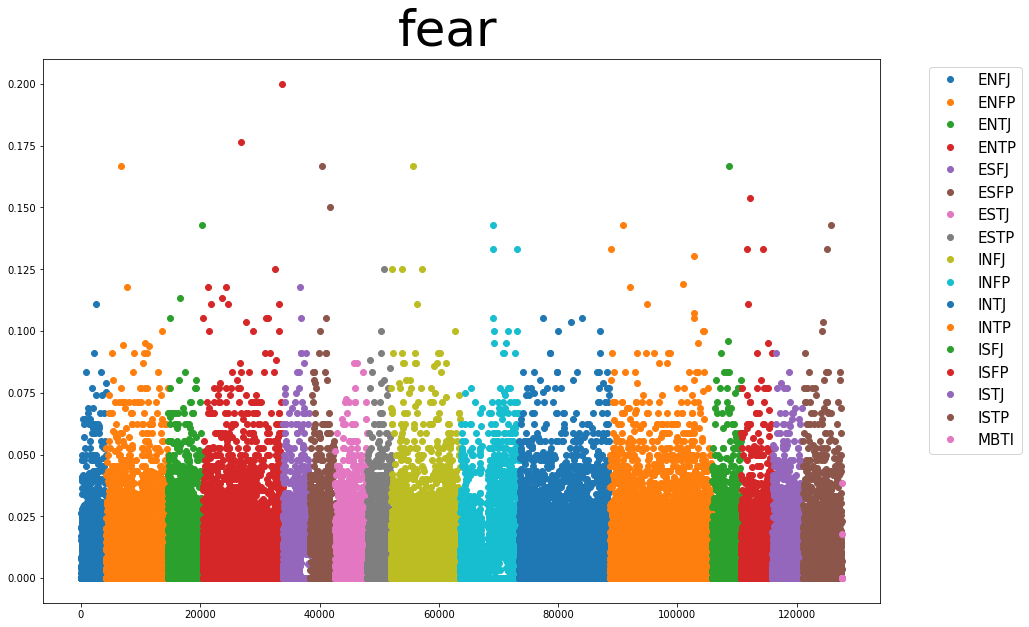

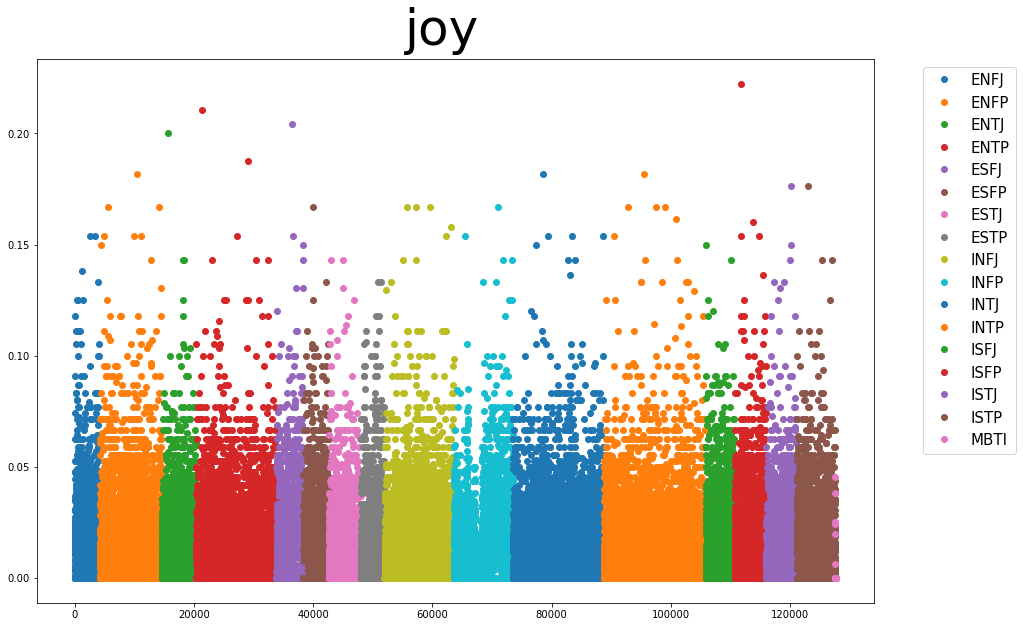

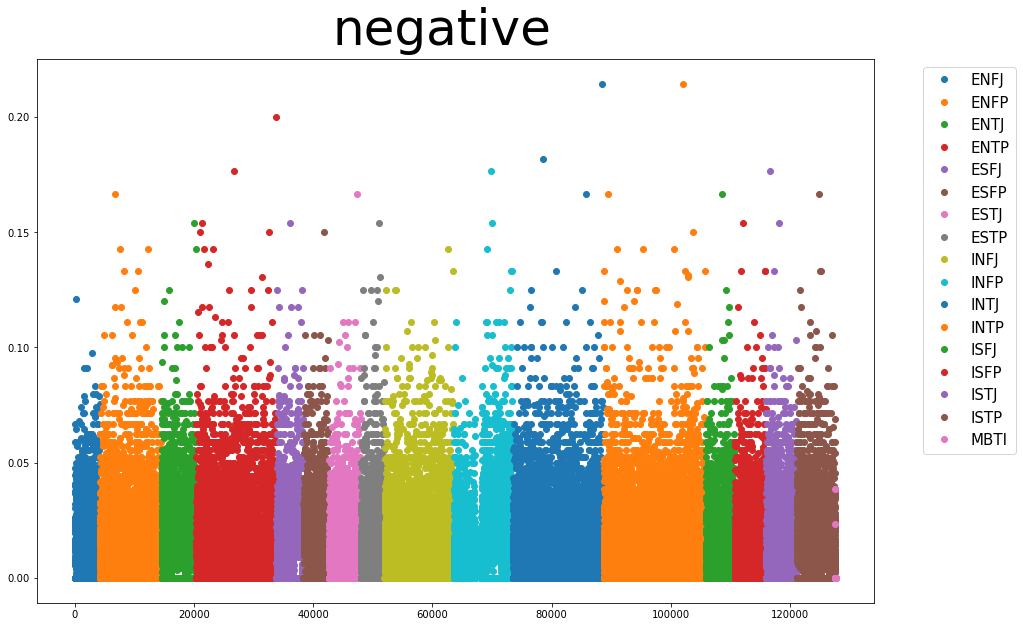

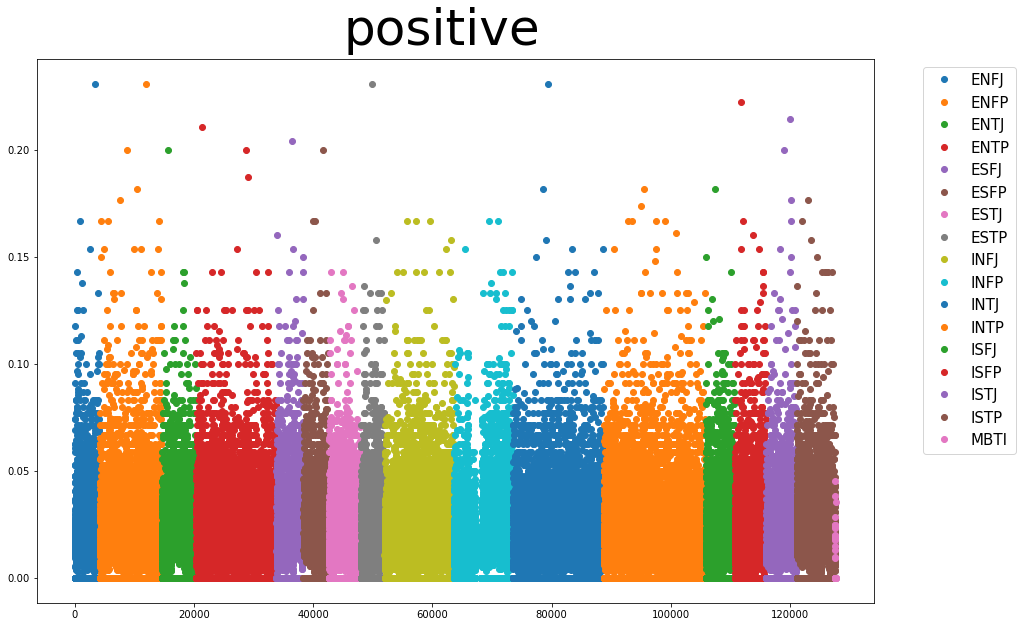

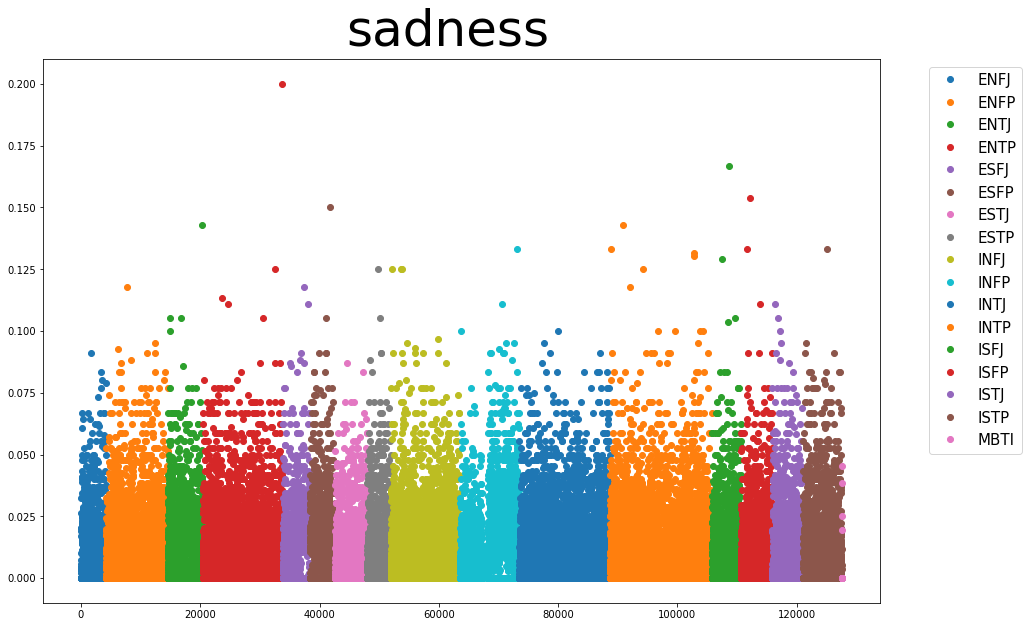

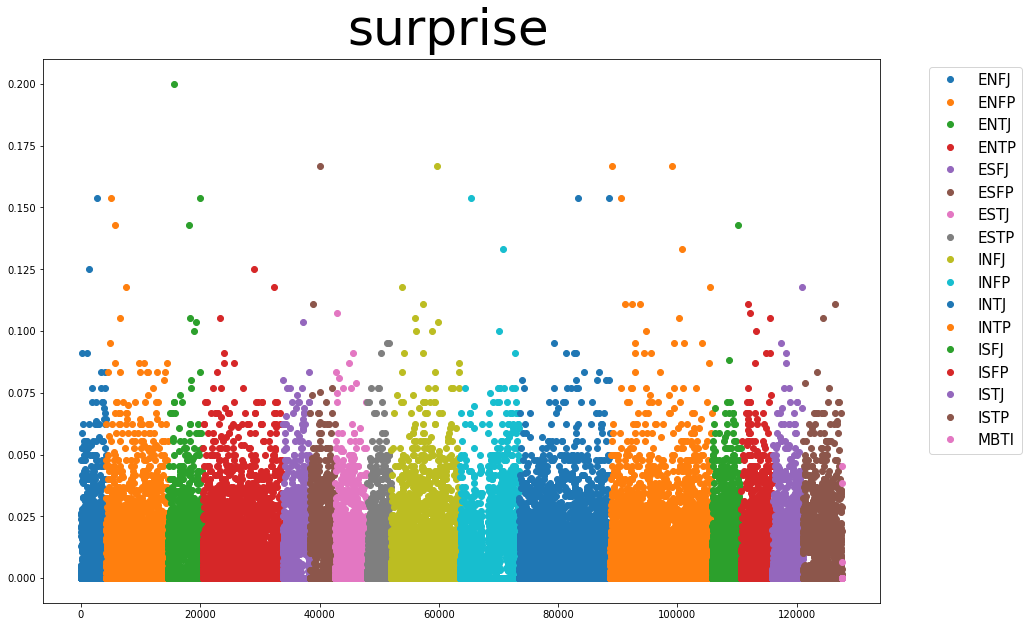

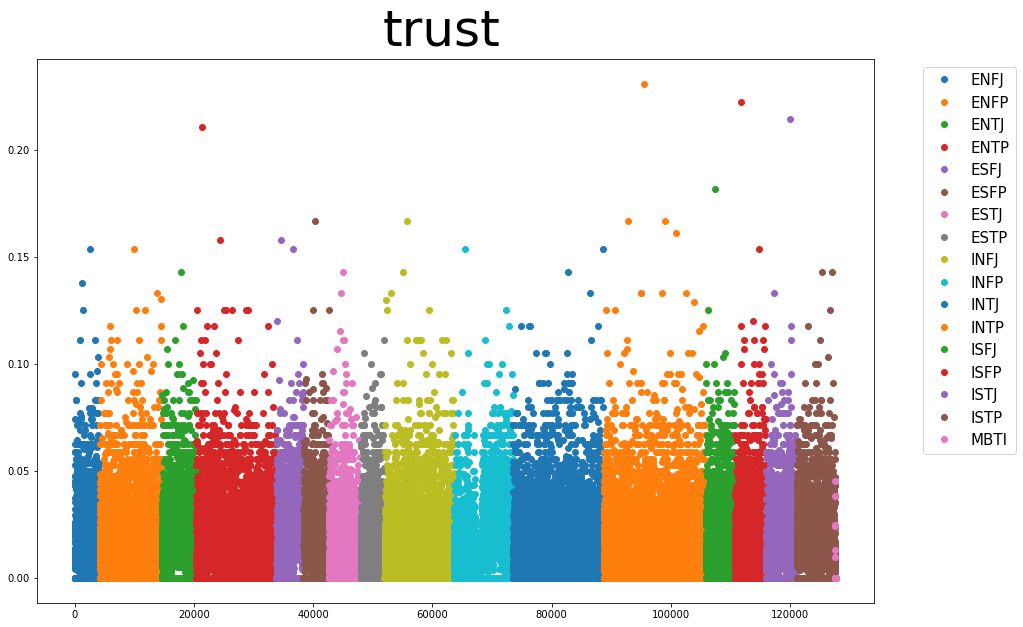

In [238]:
import matplotlib.pyplot as plt
import matplotlib

for emotion in emotions:   
    plt.figure(figsize=(15,10))
    plt.figtext(.5,.9, emotion, fontsize=50, ha='center')
    
    for name, group in groups:
        plt.plot(group.index, group[emotion], marker="o", linestyle="", label=name)
        plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
        
    plt.show()

#     plt.legend()

#     plt.show()

In [239]:
def change_tags(text):
    subtype = "Untagged"
    if text in ['INTJ', 'INTP', 'ENTJ', 'ENTP']:
        subtype = "Analyst"
    if text in ['INFJ', 'INFP', 'ENFJ', 'ENFP']:
        subtype = "Diplomat"
    if text in ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ']:
        subtype = "Sentinel"
    if text in ['ISTP', 'ISFP', 'ESTP', 'ESFP']:
        subtype = "Explorer"
    return subtype

In [240]:
df['Subtype'] = df['Tag'].apply(lambda x: change_tags(x))

In [241]:
df = df.sort_values('Subtype')
df = df.reset_index().drop(columns = 'index')

In [242]:
groups = df_shorter.groupby("Subtype")

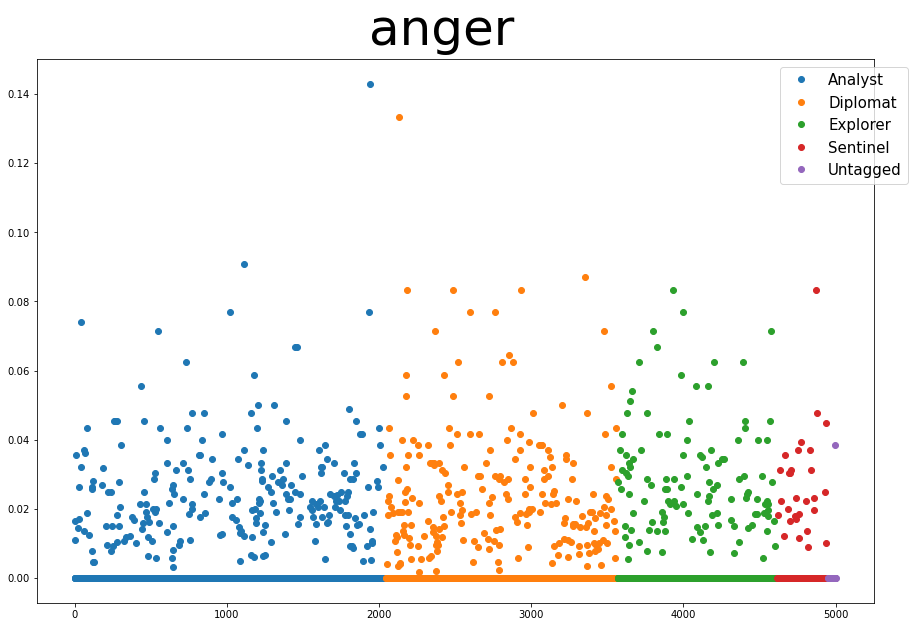

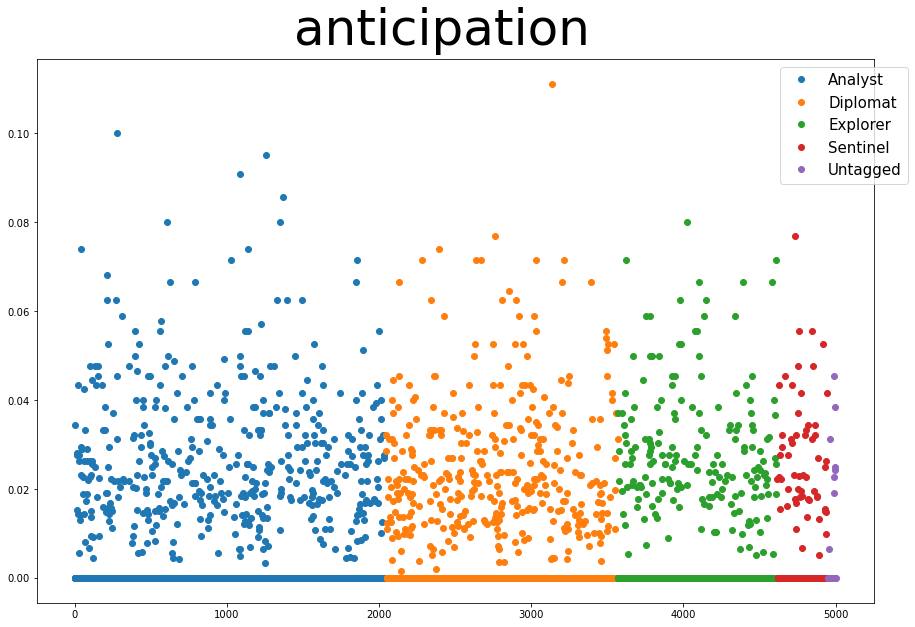

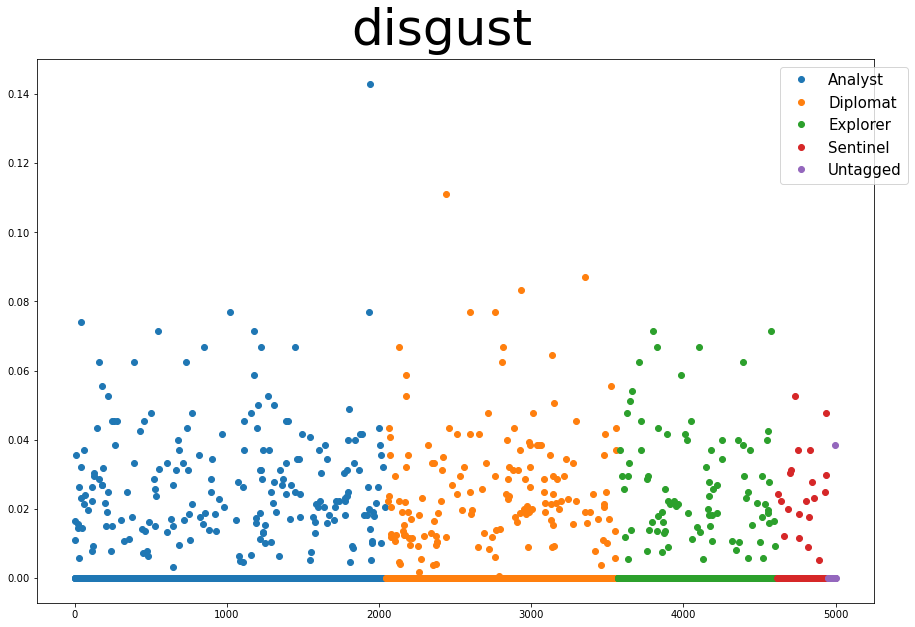

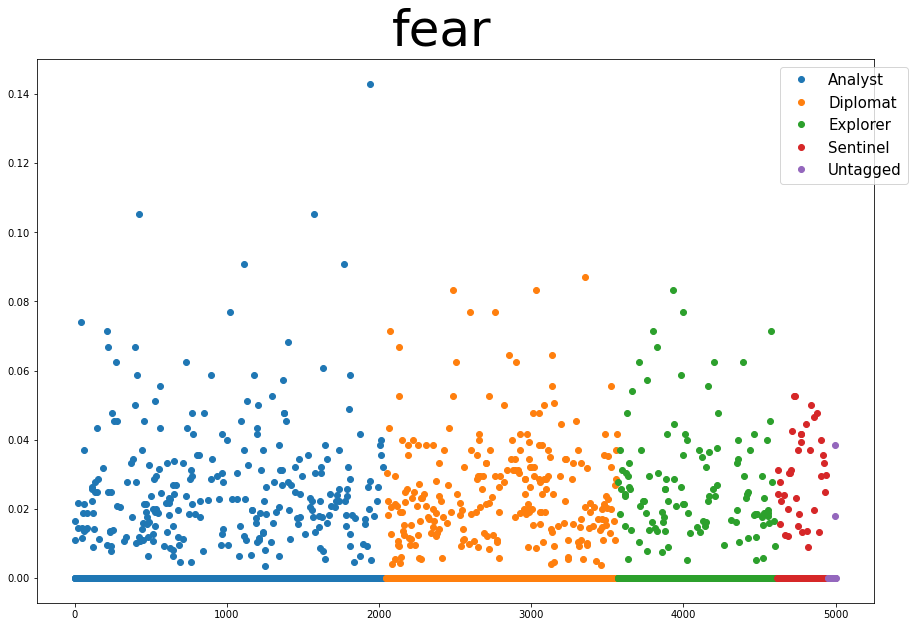

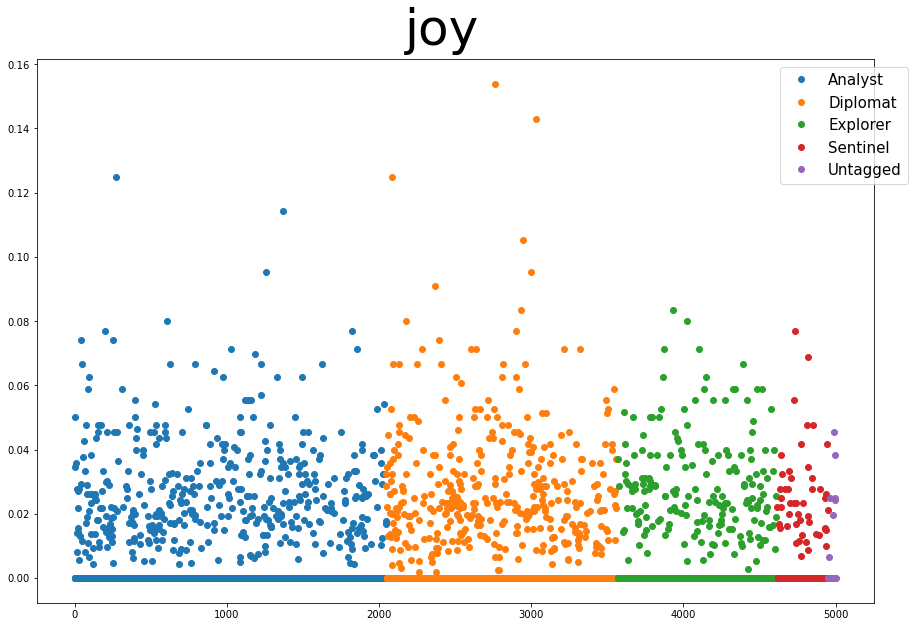

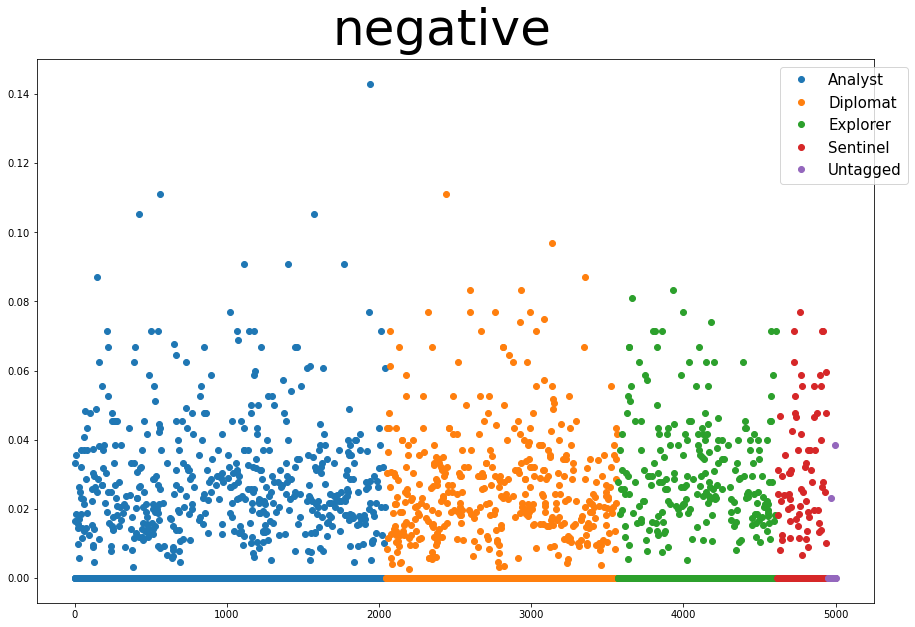

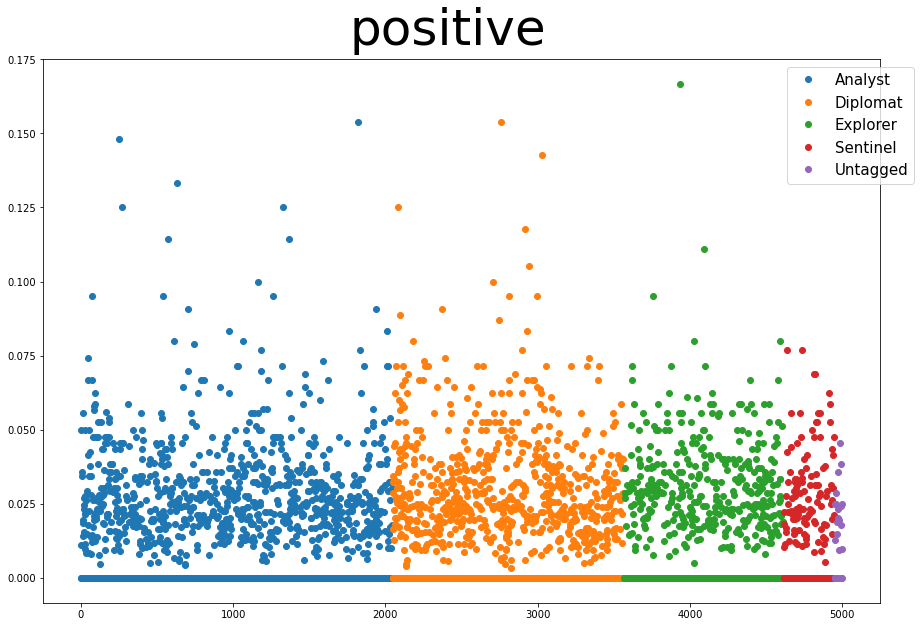

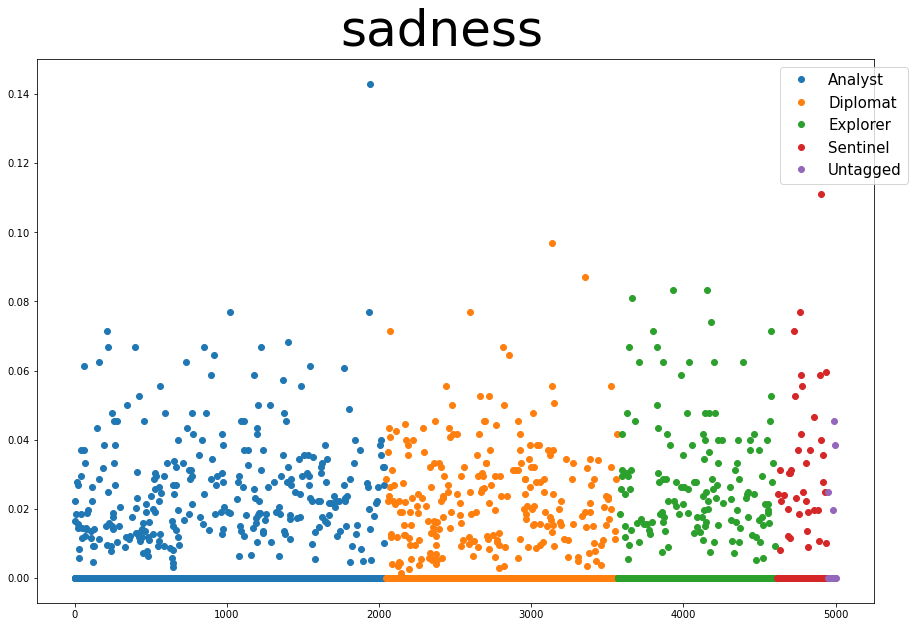

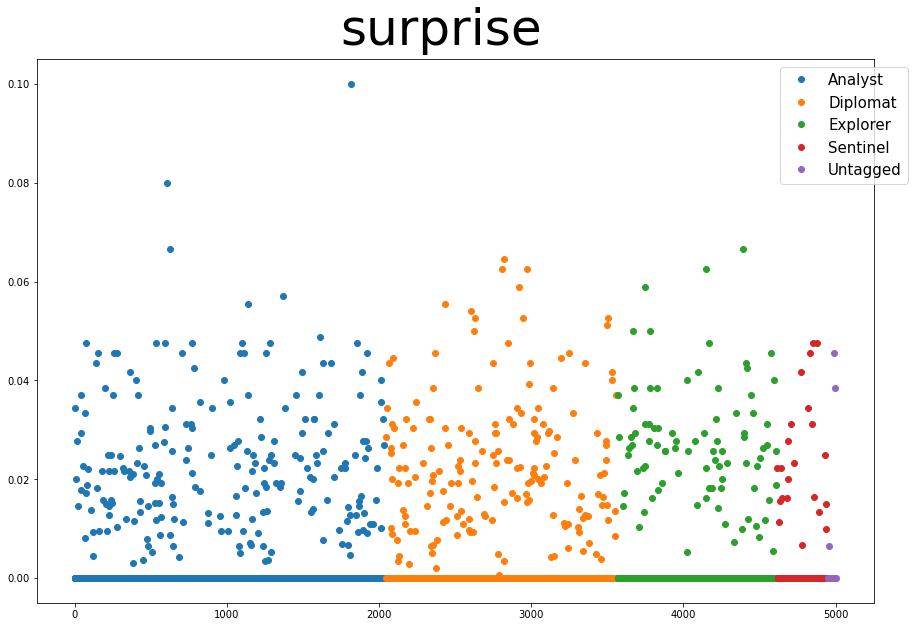

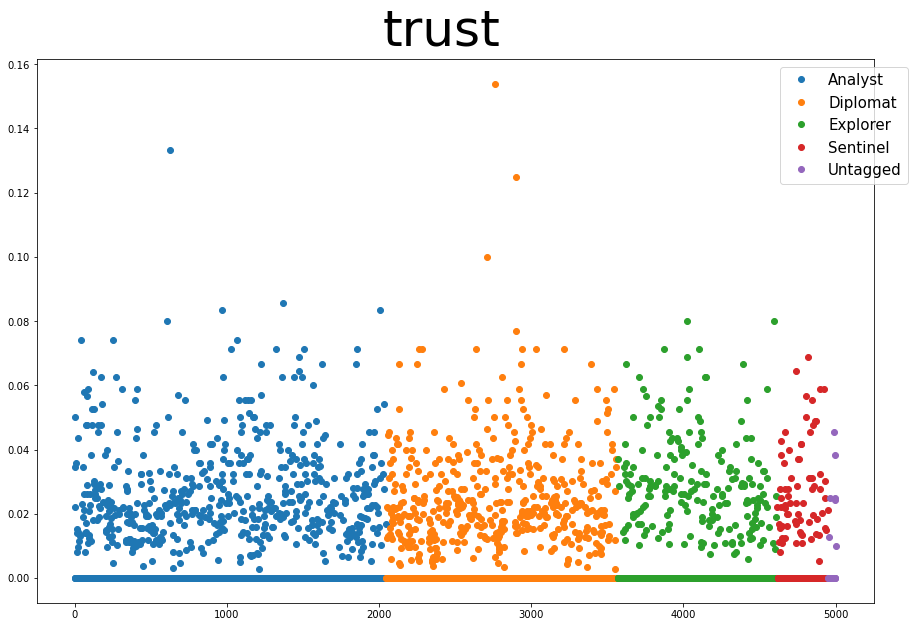

In [243]:
for emotion in emotions:   
    plt.figure(figsize=(15,10))
    plt.figtext(.5,.9, emotion, fontsize=50, ha='center')
    
    for name, group in groups:
        plt.plot(group.index, group[emotion], marker="o", linestyle="", label=name)
        plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
        
    plt.show()

In [244]:
df

,Tag,Text,Length,Unique_Words,TTR,emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Subtype
0,ENTP,harsh simply manner speech straight pointnope ...,4310,27,0.006265,"[10, 31, 7, 12, 28, 23, 49, 11, 13, 24]",0.00232,0.007193,0.001624,0.002784,0.006497,0.005336,0.011369,0.002552,0.003016,0.005568,Analyst
1,INTP,always got mediocre felt like glory paying con...,67,21,0.313433,"[0, 1, 0, 0, 1, 2, 1, 0, 0, 1]",0.00000,0.014925,0.000000,0.000000,0.014925,0.029851,0.014925,0.000000,0.000000,0.014925,Analyst
2,INTP,smoking lots weed make one kind fish really hi...,75,19,0.253333,"[0, 1, 0, 0, 2, 0, 2, 0, 1, 2]",0.00000,0.013333,0.000000,0.000000,0.026667,0.000000,0.026667,0.000000,0.013333,0.026667,Analyst
3,INTP,wooah yeeeeahh maannn riight,28,13,0.464286,[],0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Analyst
4,INTP,really excited making others feel stupid excit...,79,22,0.278481,"[0, 3, 0, 0, 3, 2, 3, 0, 3, 3]",0.00000,0.037975,0.000000,0.000000,0.037975,0.025316,0.037975,0.000000,0.037975,0.037975,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127572,MBTI,intj ladies please help prevent sad anniversar...,56,17,0.303571,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0.00000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Untagged
127573,MBTI,took test today different websites time got in...,52,18,0.346154,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.00000,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Untagged
127574,MBTI,people take mbti seriouslymbti intj,35,17,0.485714,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Untagged
127575,MBTI,intj strugglembti intj,22,13,0.590909,[],0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Untagged


In [246]:
!pip install text2emotion

In [248]:
# import text2emotion as te

# df['Te Emotions'] = [te.get_emotion(text) for text in df.Text]
# happy, angry, surprise, sad, fear = [],[],[],[],[]
# for index, row in df.iterrows():
#     happy.append(row['Te Emotions']['Happy'])
#     angry.append(row['Te Emotions']['Angry'])
#     surprise.append(row['Te Emotions']['Surprise'])
#     sad.append(row['Te Emotions']['Sad'])
#     fear.append(row['Te Emotions']['Fear'])

# df['Happy'] = happy
# df['Angry'] = angry
# df['Surprise'] = surprise
# df['Sad'] = sad
# df['Fear'] = fear

# df = df.drop(columns = ['Te Emotions'])

# df

In [44]:
v_data = pd.read_csv("MBTI_features.csv")
rl_data = pd.read_csv("Basic Features on Cleaned Data.csv")

In [55]:
def clear_text(text):
    if text.split()[0] =='rt':
        text = " ".join(text.split()[2:])
    elif text.split()[0] =='rk1s':
        text = " ".join(text.split()[1:])
    else:
        text = text
    return text

In [56]:
rl_data['Cleaned_Text'] = rl_data['Cleaned_Text'].apply(lambda x: clear_text(x))

In [57]:
v_data

,Unnamed: 0,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Length,Emoticons_count,Emoticons Avg,...,negative,positive,sadness,surprise,trust,emotion,Reddit,Twitter,Typology,Kaggle
0,0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,memeincorrect quote sure trying keep_peace family,49,1,0.020408,...,0.020408,0.040816,0.000000,0.020408,0.020408,"[0, 2, 0, 0, 1, 1, 2, 0, 1, 1]",1,0,0,0
1,1,ENTP,memefour distinct flavors nt,memefour distinct flavors nt,memefour distinct flavor,memefour distinct flavors nt,memefour distinct flavors nt,28,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,[],1,0,0,0
2,2,ENTP,memethis definitely intp looks like,memethis definitely intp looks like,memethi definit intp look like,memethis definitely intp looks_like,memethis definitely intp looks_like,35,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,[],1,0,0,0
3,3,ISFJ,theory questionwhat type admire,theory questionwhat type admire,theori questionwhat type admir,theory_questionwhat type admire,theory_questionwhat type admire,31,0,0.000000,...,0.000000,0.032258,0.000000,0.000000,0.064516,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 2]",1,0,0,0
4,4,ISTJ,memeistj x enfp real,memeistj x enfp real,memeistj enfp real,memeistj x enfp real,memeistj x enfp real,20,0,0.000000,...,0.000000,0.050000,0.000000,0.000000,0.050000,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127578,127578,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,always think cats fi_doms reason websites beco...,2833,13,0.004589,...,0.007060,0.018708,0.002824,0.003177,0.009178,"[9, 27, 5, 12, 28, 20, 53, 8, 9, 26]",0,0,0,1
127579,127579,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,soif thread already_exists someplace_else heck...,4470,22,0.004922,...,0.004922,0.015213,0.002461,0.002908,0.007606,"[9, 28, 4, 14, 35, 22, 68, 11, 13, 34]",0,0,0,1
127580,127580,INTP,many questions things would take purple pill p...,many questions things would take purple pill p...,question thing purpl pill pick win lotteri num...,many questions things would take purple pill p...,many questions things would take purple pill p...,3409,2,0.000587,...,0.008214,0.015840,0.003227,0.003227,0.009094,"[18, 28, 10, 13, 26, 28, 54, 11, 11, 31]",0,0,0,1
127581,127581,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,5396,1,0.000185,...,0.006486,0.010934,0.003706,0.001853,0.006301,"[15, 32, 8, 15, 28, 35, 59, 20, 10, 34]",0,0,0,1


In [48]:
rl_data

,Tag,Cleaned_Text,Afinn Score,Polarity,Subjectivity,Length
0,ENFJ,memeincorrect quote sure trying keep peace family,2,0.500000,0.888889,49
1,ENTP,memefour distinct flavors nt,0,0.300000,0.300000,28
2,ENTP,memethis definitely intp looks like,2,0.000000,0.500000,35
3,ISFJ,theory questionwhat type admire,3,0.000000,0.000000,31
4,ISTJ,memeistj x enfp real,0,0.200000,0.300000,20
...,...,...,...,...,...,...
134164,ISFP,always think cats fi doms reason websites beco...,23,0.139790,0.579605,2859
134165,ENFP,soif thread already exists someplace else heck...,144,0.201315,0.563804,4496
134166,INTP,many questions things would take purple pill p...,11,0.101508,0.535257,3469
134167,INFP,conflicted right comes wanting children honest...,54,0.095494,0.558648,5423


In [58]:
raw_data = pd.read_csv("raw_data.csv")

In [59]:
raw_data['Cleaned_Text'] = raw_data['Cleaned_Text'].apply(lambda x: clear_text(x))

In [60]:
s1 = pd.merge(v_data, rl_data, how='left', on=['Cleaned_Text', 'Tag'])

In [61]:
s1 = s1.drop(columns = ['Length_y'])

In [62]:
s1 = s1.rename(columns={"Length_x": "Length"})

In [65]:
is_NaN = s2.isnull()
row_has_NaN = is_NaN.any(axis=1)
s2[row_has_NaN]


,Unnamed: 0_x,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Trigram,Length,Emoticons_count,Emoticons Avg,...,conjunction,pronoun,preposition,nominalization,pronoun.1,interrogative,article,subordination,conjunction.1,preposition.1
5,5,INFP,memewhen infp wants play entp wants pretend kn...,memewhen infp wants play entp wants pretend kn...,memewhen infp want play entp want pretend know...,memewhen infp wants play entp wants pretend kn...,memewhen infp wants play entp wants pretend kn...,59,1,0.016949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,INTP,personality testmyersbriggs type indicator mbt...,personality testmyersbriggs type indicator mbt...,person testmyersbrigg type indic mbti fortun c...,personality testmyersbriggs type_indicator mbt...,personality testmyersbriggs type_indicator mbt...,76,1,0.013158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,205,ENTP,surveypollwhat whichever arm cross says type ):,surveypollwhat whichever arm cross says type,surveypollwhat whichev cross say type,surveypollwhat whichever arm cross says type,surveypollwhat whichever arm cross says type,45,1,0.022222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,435,ENFP,meet sam tourist :),meet sam tourist,meet tourist,meet sam tourist,meet sam tourist,17,1,0.058824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,520,INFJ,christian enfps :),christian enfps,christian enfp,christian enfps,christian enfps,16,1,0.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127802,127577,INFJ,sure method picking infj musical artists anoth...,sure method picking infj musical artists anoth...,sure method pick infj music artist throw cauld...,sure method picking infj musical artists anoth...,sure method_picking infj musical_artists anoth...,4335,24,0.005536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127803,127578,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,always think cats fi_doms reason websites beco...,2833,13,0.004589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127804,127579,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,soif thread already_exists someplace_else heck...,4470,22,0.004922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127806,127581,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,5396,1,0.000185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
s2 = pd.merge(s1, raw_data, how='left', on=['Cleaned_Text', 'Tag'])

In [76]:
afinn_emo = Afinn(emoticons=True)

s2['Afinn Score'] = s2['Cleaned_Text'].apply(afinn_emo.score)

In [77]:
s2['Polarity'] = s2['Cleaned_Text_No_Emoticon'].apply(lambda x: TextBlob(x).sentiment.polarity)
s2['Subjectivity'] = s2['Cleaned_Text_No_Emoticon'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [78]:
s2.columns

Index(['Unnamed: 0_x', 'Tag', 'Cleaned_Text', 'Cleaned_Text_No_Emoticon',
       'Text_stemmed', 'Bigram', 'Trigram', 'Length', 'Emoticons_count',
       'Emoticons Avg', 'Unique_Words', 'TTR', 'Dominant Emotion', 'anger',
       'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive',
       'sadness', 'surprise', 'trust', 'emotion', 'Reddit', 'Twitter',
       'Typology', 'Kaggle', 'Afinn Score', 'Polarity', 'Subjectivity',
       'Unnamed: 0_y', 'num_noun', 'num_adj', 'num_prep', 'num_det',
       'num_pron', 'num_verb', 'num_adverb', 'num_interject', 'lowercase',
       'uppercase', 'uppercase_num', 'proper cap', 'contractions_num',
       'emotionalpunctuations_num', 'readable_num', 'hedge_perc',
       'firstperson_perc', 'thirdperson_perc', 'Kincaid', 'ARI',
       'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 'LIX',
       'SMOGIndex', 'RIX', 'DaleChallIndex', 'characters_per_word',
       'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph',
    

In [79]:
s2.to_csv("MBTI_combined_features.csv")

In [28]:
s2.drop(columns=["Reddit","Twitter","Typology","Kaggle"]).to_csv("MBTI_combined_noplatforms.csv")

In [20]:
raw_data

,Tag,Text,Reddit,Twitter,Typology,Kaggle,Afinn Score,Polarity,Subjectivity,Length,...,conjunction,pronoun,preposition,nominalization,pronoun.1,interrogative,article,subordination,conjunction.1,preposition.1
0,INFP,Meme<3,1,0,0,0,3,0.000000,0.000000,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENFJ,"MemeIncorrect Quote? Not so sure. Just me, try...",1,0,0,0,2,0.500000,0.888889,83,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,INTP,MemeENFP Avatar,1,0,0,0,0,0.000000,0.000000,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENTP,MemeFour Distinct Flavors of NT,1,0,0,0,0,0.300000,0.300000,32,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,INTJ,StereotypesINFP 🦋,1,0,0,0,0,0.000000,0.000000,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212133,ISFP,httpswww.youtube.comwatch?v=t8edHB_h908|||IxFP...,0,0,0,1,21,0.136994,0.575641,4960,...,26.0,129.0,93.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
212134,ENFP,'So...if this thread already exists someplace ...,0,0,0,1,176,0.202983,0.550482,7843,...,75.0,251.0,140.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
212135,INTP,'So many questions when i do these things. I ...,0,0,0,1,21,0.105284,0.522723,5752,...,32.0,155.0,96.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
212136,INFP,'I am very conflicted right now when it comes ...,0,0,0,1,60,0.117591,0.543356,9470,...,63.0,300.0,216.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
rl_data

,Tag,Cleaned_Text,Afinn Score,Polarity,Subjectivity,Length
0,ENFJ,memeincorrect quote sure trying keep peace family,2.0,0.500000,0.888889,49
1,ENTP,memefour distinct flavors nt,0.0,0.300000,0.300000,28
2,ENTP,memethis definitely intp looks like,2.0,0.000000,0.500000,35
3,ISFJ,theory questionwhat type admire,3.0,0.000000,0.000000,31
4,ISTJ,memeistj x enfp real,0.0,0.200000,0.300000,20
...,...,...,...,...,...,...
134164,ISFP,always think cats fi doms reason websites beco...,23.0,0.139790,0.579605,2859
134165,ENFP,soif thread already exists someplace else heck...,144.0,0.201315,0.563804,4496
134166,INTP,many questions things would take purple pill p...,11.0,0.101508,0.535257,3469
134167,INFP,conflicted right comes wanting children honest...,54.0,0.095494,0.558648,5423
